In [26]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt


In [27]:
df = pd.read_csv(
    r"C:\Users\Seerat Metkari\Downloads\housing.csv"
)



df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [28]:
print(df.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='str')


In [29]:
categorical_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning',
    'prefarea', 'furnishingstatus'
]

le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [30]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [31]:
X = df.drop("price", axis=1)
y = df["price"]


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression R² Score:", r2_lr)


Linear Regression R² Score: 0.6494754192267804


In [34]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest R² Score:", r2_rf)


Random Forest R² Score: 0.6115321143409216


In [35]:
print("Linear Regression R²:", r2_lr)
print("Random Forest R²:", r2_rf)


Linear Regression R²: 0.6494754192267804
Random Forest R²: 0.6115321143409216


In [36]:
importances = rf.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False
)

print(feature_importance_df)


             Feature  Importance
0               area    0.470417
2          bathrooms    0.152678
8    airconditioning    0.062343
9            parking    0.056608
3            stories    0.054772
11  furnishingstatus    0.050352
1           bedrooms    0.047950
6           basement    0.031695
10          prefarea    0.029982
7    hotwaterheating    0.017148
5          guestroom    0.015919
4           mainroad    0.010137


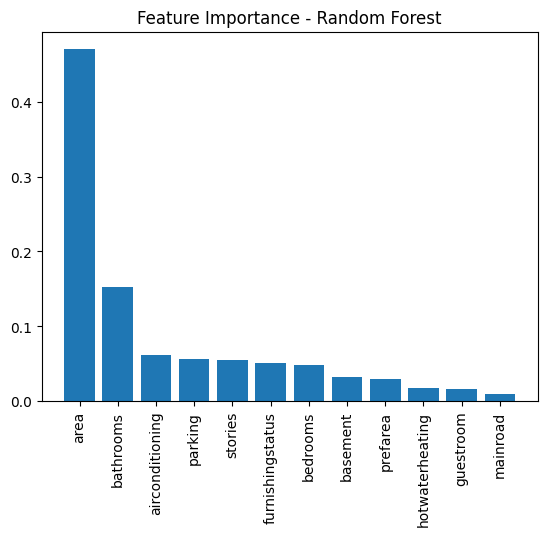

In [37]:
plt.figure()
plt.bar(feature_importance_df['Feature'],
        feature_importance_df['Importance'])

plt.xticks(rotation=90)
plt.title("Feature Importance - Random Forest")
plt.show()


In [38]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=100,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost R² Score:", r2_xgb)


XGBoost R² Score: 0.597907543182373


In [39]:
print("Linear Regression R²:", r2_lr)
print("Random Forest R²:", r2_rf)
print("XGBoost R²:", r2_xgb)


Linear Regression R²: 0.6494754192267804
Random Forest R²: 0.6115321143409216
XGBoost R²: 0.597907543182373
